In [2]:
from utils import read_bills, read_bills_without_normalize
import os
from collections import Counter, defaultdict
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import regex as re

# Read bills

In [47]:
current_dir = os.getcwd()
bills_dict = read_bills_without_normalize(f"{current_dir}/data/first_ex_data/ustawy")

In [48]:
bills_dict['2001_874']

'\n\n\n\nDz.U. z 2001 r. Nr 81, poz. 874\n                                        \n                                        \n                                     USTAWA\n                           z dnia 21 czerwca  2001 r.\n                                        \n                  o zmianie ustawy o Państwowej Straży Pożarnej\n                                        \n                                        \n                                     Art. 1.\nW ustawie z dnia 24 sierpnia 1991 r. o Państwowej Straży Pożarnej (Dz.U. Nr 88,\npoz. 400 z 1992 r. Nr 21, poz. 86 i Nr 54, poz. 254, z 1994 r. Nr 53, poz. 214,\nz 1995 r. Nr 4, poz. 17 i Nr 34, poz. 163, z 1996 r. Nr 106, poz. 496 i Nr 152,\npoz. 723, z 1997 r. Nr 28, poz. 153, Nr 88, poz. 554 i Nr 106, poz. 680, z 1998\nr. Nr 106, poz. 668 oraz z 1999 r. Nr 45, poz. 436 i Nr 110, poz. 1255) art. 19c\notrzymuje brzmienie:\n    "Art. 19c. Wykonywanie zadań zleconych szkołom Państwowej Straży Pożarnej\n           przez osoby prawne 

# Sort bills according to their size and take top 50 (largest) bills.

In [49]:
sorted_bills = sorted(bills_dict.items(), key= lambda item: len(item[1]))

In [50]:
biggest_bills = sorted_bills[-50:]

# Use the lemmatized and sentence split documents (from ex. 5) to identify the expressions that consist of consecutive words starting with a capital letter (you will have to look at the inflected form of the word to check its capitalization) that do not occupy the first position in a sentence. E.g. the sentence: 

In [37]:
# Zakładam że chodzi o to aby te ustawy przepuścić przez clairna

In [51]:
# biggest_bills = dict(biggest_bills)

In [52]:
# biggest_bills_text = ' '.join(biggest_bills.values())

In [53]:
# with open('biggest_bills_text.txt', 'w') as f:
#     f.write(biggest_bills_text)

In [129]:
import xml.etree.ElementTree as ET

In [130]:
with open('biggest_bills_results.txt', 'r') as f:
    results = f.read()

In [131]:
xml_tree = ET.fromstring(results)

In [132]:
# capital_words = []
# for tok in xml_tree.iter('tok'):
#     for lex in tok.iter('lex'):
#         base = lex.find("base").text
# #         ctag = match.findall(lex.find("ctag").text)[0]
#         if base[0].isupper():
#             capital_words.append(base)
#         break

In [184]:
len(re.findall(r'[.,]',"abc."))

1

In [197]:
capital_words = []
word = []
is_upper = False
for tok in xml_tree.iter('tok'):
    orth = tok.find("orth").text
#     and len(re.findall(r'[.,]',orth)) == 0
#         ctag = match.findall(lex.find("ctag").text)[0]
# orth[0].isalpha()
    if orth[0].isupper():
        word.append(orth)
        is_upper = True
    else:
        is_upper = False
    if len(word) > 1 and not is_upper:
        capital_words.append(" ".join(word))
        word = []

In [198]:
capital_words_counted = dict(Counter(capital_words))

In [199]:
capital_words_counted_sorted = sorted(capital_words_counted.items(), key= lambda item: item[1])

In [200]:
capital_words_counted_sorted[-50:]

[('Art Sąd', 57),
 ('Nr Dz', 59),
 ('Rozdział Przepisy', 59),
 ('Kto Art', 62),
 ('Skarb Państwa', 63),
 ('Polityki Socjalnej', 65),
 ('Monitor Polski', 67),
 ('Art Na', 67),
 ('Art Z', 69),
 ('Art Przepisy', 70),
 ('Dz Urz', 72),
 ('Art Organ', 79),
 ('W Jeżeli', 80),
 ('Minister Finansów', 81),
 ('Jeżeli W', 83),
 ('Minister Obrony Narodowej', 84),
 ('Opieki Społecznej', 86),
 ('Zmiany Dz', 92),
 ('EFTA Europejskim Obszarze Gospodarczym', 93),
 ('Przepis Art', 96),
 ('Minister Minister', 101),
 ('Europejskiego Porozumienia', 105),
 ('Wolnym Handlu', 105),
 ('Prawo Dz', 111),
 ('Kasy Chorych', 117),
 ('Do Art', 123),
 ('Jeżeli Jeżeli', 126),
 ('Prezes Rady Ministrów', 139),
 ('Art Minister', 140),
 ('Przepisy Art', 140),
 ('Minister Sprawiedliwości', 141),
 ('Minister Art', 143),
 ('Państwowej Straży Pożarnej', 157),
 ('Rada Ministrów', 158),
 ('Nr Art', 175),
 ('Skarbu Państwa', 176),
 ('W Dz', 179),
 ('Straży Granicznej', 185),
 ('Art Do', 188),
 ('W W', 203),
 ('Unii Europejskiej',

# Apply the NER algorithm to identify the named entities in the same set of documents (not lemmatized) using the n82 model.

In [7]:
with open('biggest_bills_ner_results.txt', 'r') as f:
    results_ner = f.read()

In [8]:
xml_tree_ner = ET.fromstring(results_ner)

In [223]:
regex = re.compile(r"([^_]+_[^_]+)")

In [225]:
regex.findall("nam_pro_media_ab")[0]

'nam_pro'

# Plot the frequency (histogram) of the coarse-grained classes (e.g. nam_adj, nam_eve, nam_fac).

In [79]:
# NE = []
# regex = re.compile(r"([^_]+_[^_]+)")
# for sentence in xml_tree_ner.iter("sentence"):
#     for tok in sentence.iter("tok"):
#         for base in tok.iter("base"):
#             if base.text[0].isupper():
#                 for ann in tok.iter("ann"):
#                     if ann.text == "1":
#                         NE.append({base.text : regex.findall(ann.attrib["chan"])[0]})
#             break

In [97]:
NE = []
regex = re.compile(r"([^_]+_[^_]+)")
for sentence in xml_tree_ner.iter("sentence"):
    one_ne = []
    for tok in sentence.iter("tok"):
        orth = tok.find("orth").text
        current_ann = 0
        if orth[0].isupper():
            for ann in tok.iter("ann"):
                if int(ann.text) > 0:
                    current_ann = int(ann.text)
                    one_ne.append({orth : regex.findall(ann.attrib["chan"])[0]})
        elif len(one_ne) > 0 and current_ann == 0:
            parsed_ne = [list(x.keys())[0] for x in one_ne]
            parsed_name = [list(x.values())[0] for x in one_ne]
            NE.append({" ".join(parsed_ne) : parsed_name[0]})
            one_ne = []
    if len(one_ne) > 0:
        parsed_ne = [list(x.keys())[0] for x in one_ne]
        parsed_name = [list(x.values())[0] for x in one_ne]
        NE.append({" ".join(parsed_ne) : parsed_name[0]})
        one_ne = []

In [98]:
NE

[{'Dz': 'nam_pro'},
 {'U': 'nam_pro'},
 {'Prawo': 'nam_pro'},
 {'Dz': 'nam_pro'},
 {'U': 'nam_pro'},
 {'Straży Granicznej': 'nam_org'},
 {'Ministrem Obrony Narodowej': 'nam_org'},
 {'Ministrem Obrony Narodowej': 'nam_org'},
 {'Minister Obrony Narodowej': 'nam_org'},
 {'Ministrowi Obrony Narodowej': 'nam_org'},
 {'Urzędu Ochrony Państwa': 'nam_org'},
 {'Straży Granicznej': 'nam_org'},
 {'Służby Więziennej': 'nam_org'},
 {'Sił Zbrojnych': 'nam_org'},
 {'Sił Zbrojnych': 'nam_org'},
 {'Ministrem Obrony Narodowej': 'nam_org'},
 {'Generalny Dyrektor Dróg Publicznych': 'nam_liv'},
 {'Sił Zbrojnych': 'nam_org'},
 {'Minister Obrony Narodowej': 'nam_org'},
 {'Minister Sprawiedliwości': 'nam_org'},
 {'VIN': 'nam_org'},
 {'Skarbu Państwa': 'nam_org'},
 {'Służby Więziennej': 'nam_org'},
 {'Ministrem Obrony Narodowej': 'nam_org'},
 {'Rzeczypospolitej Polskiej': 'nam_loc'},
 {'Skarbu Państwa': 'nam_org'},
 {'Sił Zbrojnych': 'nam_org'},
 {'Urzędu Ochrony Państwa': 'nam_org'},
 {'Straży Granicznej': 'n

In [99]:
coarse_grained_classes = [list(x.values())[0] for x in NE]

In [100]:
coarse_grained_classes

['nam_pro',
 'nam_pro',
 'nam_pro',
 'nam_pro',
 'nam_pro',
 'nam_org',
 'nam_org',
 'nam_org',
 'nam_org',
 'nam_org',
 'nam_org',
 'nam_org',
 'nam_org',
 'nam_org',
 'nam_org',
 'nam_org',
 'nam_liv',
 'nam_org',
 'nam_org',
 'nam_org',
 'nam_org',
 'nam_org',
 'nam_org',
 'nam_org',
 'nam_loc',
 'nam_org',
 'nam_org',
 'nam_org',
 'nam_org',
 'nam_loc',
 'nam_loc',
 'nam_liv',
 'nam_org',
 'nam_oth',
 'nam_org',
 'nam_org',
 'nam_org',
 'nam_org',
 'nam_org',
 'nam_org',
 'nam_org',
 'nam_org',
 'nam_org',
 'nam_org',
 'nam_org',
 'nam_org',
 'nam_org',
 'nam_loc',
 'nam_loc',
 'nam_org',
 'nam_liv',
 'nam_org',
 'nam_oth',
 'nam_loc',
 'nam_liv',
 'nam_org',
 'nam_org',
 'nam_org',
 'nam_org',
 'nam_org',
 'nam_org',
 'nam_org',
 'nam_org',
 'nam_loc',
 'nam_liv',
 'nam_org',
 'nam_org',
 'nam_org',
 'nam_loc',
 'nam_org',
 'nam_loc',
 'nam_org',
 'nam_org',
 'nam_org',
 'nam_org',
 'nam_org',
 'nam_org',
 'nam_org',
 'nam_org',
 'nam_org',
 'nam_org',
 'nam_org',
 'nam_org',
 'na

In [101]:
coarse_grained_classes_counted = dict(Counter(coarse_grained_classes))

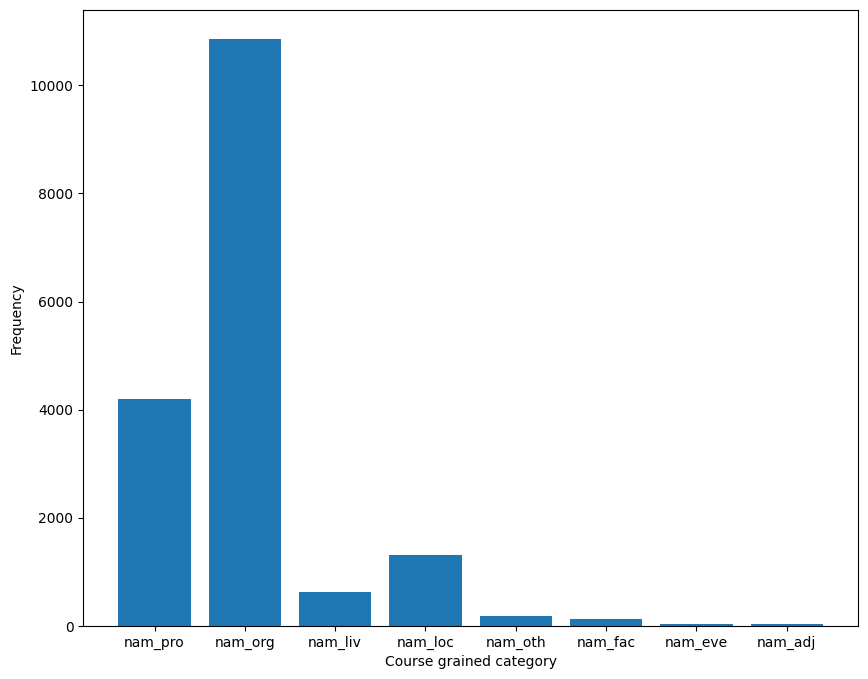

In [102]:
plt.figure(figsize=(10, 8))
plt.bar(coarse_grained_classes_counted.keys(), coarse_grained_classes_counted.values())
plt.xlabel("Course grained category")
plt.ylabel("Frequency")
plt.show()

# Display 10 most frequent Named Entities for each coarse-grained type.

In [103]:
# NE_tup = [list(x.items())[0] for x in NE]

In [104]:
NE

[{'Dz': 'nam_pro'},
 {'U': 'nam_pro'},
 {'Prawo': 'nam_pro'},
 {'Dz': 'nam_pro'},
 {'U': 'nam_pro'},
 {'Straży Granicznej': 'nam_org'},
 {'Ministrem Obrony Narodowej': 'nam_org'},
 {'Ministrem Obrony Narodowej': 'nam_org'},
 {'Minister Obrony Narodowej': 'nam_org'},
 {'Ministrowi Obrony Narodowej': 'nam_org'},
 {'Urzędu Ochrony Państwa': 'nam_org'},
 {'Straży Granicznej': 'nam_org'},
 {'Służby Więziennej': 'nam_org'},
 {'Sił Zbrojnych': 'nam_org'},
 {'Sił Zbrojnych': 'nam_org'},
 {'Ministrem Obrony Narodowej': 'nam_org'},
 {'Generalny Dyrektor Dróg Publicznych': 'nam_liv'},
 {'Sił Zbrojnych': 'nam_org'},
 {'Minister Obrony Narodowej': 'nam_org'},
 {'Minister Sprawiedliwości': 'nam_org'},
 {'VIN': 'nam_org'},
 {'Skarbu Państwa': 'nam_org'},
 {'Służby Więziennej': 'nam_org'},
 {'Ministrem Obrony Narodowej': 'nam_org'},
 {'Rzeczypospolitej Polskiej': 'nam_loc'},
 {'Skarbu Państwa': 'nam_org'},
 {'Sił Zbrojnych': 'nam_org'},
 {'Urzędu Ochrony Państwa': 'nam_org'},
 {'Straży Granicznej': 'n

In [105]:
NE_class = defaultdict(list)

In [106]:
for n in NE:
    NE_class[list(n.values())[0]].append(list(n.keys())[0])

In [107]:
for k, v in NE_class.items():
    print(k)
    print(Counter(v).most_common()[:10])

nam_pro
[('Dz', 1638), ('U', 1542), ('Kodeksu', 257), ('Prawo', 101), ('Ordynacja', 82), ('Urz', 80), ('Monitor Polski', 66), ('Kodeks', 54), ('Konwencji', 29), ('Natura', 26)]
nam_org
[('Skarbu Państwa', 289), ('Unii Europejskiej', 288), ('Rada Ministrów', 264), ('Minister Sprawiedliwości', 239), ('Państwowej Straży Pożarnej', 222), ('Prezes Rady Ministrów', 219), ('Minister Obrony Narodowej', 162), ('Minister Finansów', 155), ('Urzędu Ochrony Państwa', 120), ('EFTA', 114)]
nam_liv
[('Kasa Chorych', 50), ('Straży Granicznej', 31), ('Sił Zbrojnych', 23), ('Kasy Chorych', 21), ('Art', 18), ('Pana', 18), ('Zysk', 17), ('Pan', 15), ('Krajowego Depozytu', 15), ('Kas Chorych', 13)]
nam_loc
[('Rzeczypospolitej Polskiej', 659), ('Rzeczpospolita Polska', 52), ('Polsce', 51), ('Rzeczpospolitą Polską', 39), ('Warszawie', 32), ('Warszawy', 20), ('Nawóz', 19), ('Warszawa', 16), ('Konfederacji Szwajcarskiej', 11), ('Nawozy', 9)]
nam_oth
[('VIII', 50), ('EURO', 27), ('BAT', 12), ('PESEL', 11), ('PLN

# Display 50 most frequent Named Entities including their count and fine-grained type.

In [301]:
NE_fine_grained = []
for sentence in xml_tree_ner.iter("sentence"):
    for tok in sentence.iter("tok"):
        for base in tok.iter("base"):
            if base.text[0].isupper():
                for ann in tok.iter("ann"):
                    if ann.text == "1":
                        NE_fine_grained.append({base.text : ann.attrib["chan"]})
            break

In [108]:
NE_fine_grained = []
regex = re.compile(r"([^_]+_[^_]+)")
for sentence in xml_tree_ner.iter("sentence"):
    one_ne = []
    for tok in sentence.iter("tok"):
        orth = tok.find("orth").text
        current_ann = 0
        if orth[0].isupper():
            for ann in tok.iter("ann"):
                if int(ann.text) > 0:
                    current_ann = int(ann.text)
                    one_ne.append({orth : ann.attrib["chan"]})
        elif len(one_ne) > 0 and current_ann == 0:
            parsed_ne = [list(x.keys())[0] for x in one_ne]
            parsed_name = [list(x.values())[0] for x in one_ne]
            NE_fine_grained.append({" ".join(parsed_ne) : parsed_name[0]})
            one_ne = []
    if len(one_ne) > 0:
        parsed_ne = [list(x.keys())[0] for x in one_ne]
        parsed_name = [list(x.values())[0] for x in one_ne]
        NE.append({" ".join(parsed_ne) : parsed_name[0]})
        one_ne = []

In [109]:
NE_fine_grained

[{'Dz': 'nam_pro_media_periodic'},
 {'U': 'nam_pro_media_periodic'},
 {'Prawo': 'nam_pro_title_document'},
 {'Dz': 'nam_pro_media_periodic'},
 {'U': 'nam_pro_media_periodic'},
 {'Straży Granicznej': 'nam_org_organization'},
 {'Ministrem Obrony Narodowej': 'nam_org_institution'},
 {'Ministrem Obrony Narodowej': 'nam_org_institution'},
 {'Minister Obrony Narodowej': 'nam_org_institution'},
 {'Ministrowi Obrony Narodowej': 'nam_org_institution'},
 {'Urzędu Ochrony Państwa': 'nam_org_institution'},
 {'Straży Granicznej': 'nam_org_institution'},
 {'Służby Więziennej': 'nam_org_institution'},
 {'Sił Zbrojnych': 'nam_org_institution'},
 {'Sił Zbrojnych': 'nam_org_institution'},
 {'Ministrem Obrony Narodowej': 'nam_org_institution'},
 {'Generalny Dyrektor Dróg Publicznych': 'nam_liv_person'},
 {'Sił Zbrojnych': 'nam_org_institution'},
 {'Minister Obrony Narodowej': 'nam_org_institution'},
 {'Minister Sprawiedliwości': 'nam_org_institution'},
 {'VIN': 'nam_org_organization'},
 {'Skarbu Państwa'

In [110]:
NE_fine_grained_tup = [list(x.items())[0] for x in NE_fine_grained]

In [111]:
Counter(NE_fine_grained_tup).most_common()[:50]

[(('Dz', 'nam_pro_media_periodic'), 1638),
 (('U', 'nam_pro_media_periodic'), 1542),
 (('Rzeczypospolitej Polskiej', 'nam_loc_gpe_country'), 658),
 (('Skarbu Państwa', 'nam_org_institution'), 288),
 (('Unii Europejskiej', 'nam_org_organization'), 286),
 (('Rada Ministrów', 'nam_org_institution'), 264),
 (('Kodeksu', 'nam_pro_title_document'), 255),
 (('Minister Sprawiedliwości', 'nam_org_institution'), 239),
 (('Prezes Rady Ministrów', 'nam_org_institution'), 219),
 (('Państwowej Straży Pożarnej', 'nam_org_organization'), 187),
 (('Minister Obrony Narodowej', 'nam_org_institution'), 162),
 (('Minister Finansów', 'nam_org_institution'), 155),
 (('Urzędu Ochrony Państwa', 'nam_org_institution'), 120),
 (('EFTA', 'nam_org_organization'), 114),
 (('Państwowa Komisja Wyborcza', 'nam_org_institution'), 110),
 (('Urząd Patentowy', 'nam_org_institution'), 104),
 (('Europejskiego Porozumienia', 'nam_org_company'), 103),
 (('Wolnym Handlu', 'nam_org_company'), 103),
 (('Prawo', 'nam_pro_title_do

# Display 5 sentences containing at least 2 recognized named entities with different types. Highlight the recognized spans with color. (For demo application Streamlit might be useful for displaying NER results).

In [53]:
NE_sentences = []
find_ne = []
for sentence in xml_tree_ner.iter("sentence"):
    saved_sentence = []
    saved_ne = {}
    first_type = ""
    has_two_ne = False
    for tok in sentence.iter("tok"):
        for base in tok.iter("base"):
            saved_sentence.append(tok.find("orth").text)
            if base.text[0].isupper():
                for ann in tok.iter("ann"):
                    if ann.text == "1":
#                         NE_fine_grained.append({base.text : ann.attrib["chan"]})
                        if list(saved_ne.keys()).count(ann.attrib["chan"]) == 0:
                            saved_ne[ann.attrib["chan"]] = base.text
            break
    if len(saved_ne) >= 2:
        NE_sentences.append(saved_sentence)
        find_ne.append(saved_ne)

In [117]:
NE_sentences = []
find_ne = []
for sentence in xml_tree_ner.iter("sentence"):
    one_ne = []
    saved_sentence = []
    saved_ne = {}
    for tok in sentence.iter("tok"):
        orth = tok.find("orth").text
        saved_sentence.append(orth)
        current_ann = 0
#         if orth[0].isupper():
        for ann in tok.iter("ann"):
            if int(ann.text) > 0:
                current_ann = int(ann.text)
                one_ne.append({orth : ann.attrib["chan"]})
        elif len(one_ne) > 0 and current_ann == 0:
            parsed_ne = [list(x.keys())[0] for x in one_ne]
            parsed_name = [list(x.values())[0] for x in one_ne]
#             NE_fine_grained.append({" ".join(parsed_ne) : parsed_name[0]})
            if list(saved_ne.keys()).count(parsed_name) == 0:
                saved_ne[parsed_name[0]] = " ".join(parsed_ne)
            one_ne = []
    if len(one_ne) > 0:
        parsed_ne = [list(x.keys())[0] for x in one_ne]
        parsed_name = [list(x.values())[0] for x in one_ne]
#         NE.append({" ".join(parsed_ne) : parsed_name[0]})
        if list(saved_ne.keys()).count(parsed_name) == 0:
                saved_ne[parsed_name[0]] = " ".join(parsed_ne)
        one_ne = []
    if len(saved_ne) >= 2:
        NE_sentences.append(saved_sentence)
        find_ne.append(saved_ne)

In [118]:
len(NE_sentences)

1791

In [119]:
len(find_ne)

1791

In [120]:
find_ne

[{'nam_pro_title_document': 'Prawo', 'nam_pro_media_periodic': 'U'},
 {'nam_loc_gpe_country': 'Rzeczypospolitej Polskiej',
  'nam_org_institution': 'Sił Zbrojnych'},
 {'nam_liv_person': 'Krajowego Rejestru Karnego',
  'nam_org_company': 'REGON',
  'nam_oth_tech': 'NIP'},
 {'nam_loc_gpe_country': 'Rzeczypospolitej Polskiej',
  'nam_org_institution': 'Krajowym Rejestrze Sądowym Sądowym'},
 {'nam_liv_person': 'Krajowego Rejestru Karnego',
  'nam_org_company': 'REGON',
  'nam_oth_tech': 'NIP'},
 {'nam_org_institution': 'Straży Granicznej',
  'nam_org_organization': 'Państwowej Straży Pożarnej'},
 {'nam_loc_gpe_country': 'Rzeczypospolitej Polskiej',
  'nam_org_institution': 'Straży Granicznej'},
 {'nam_org_organization': 'Państwowej Straży Pożarnej',
  'nam_org_institution': 'Generalnej Dyrekcji Dróg Publicznych'},
 {'nam_org_institution': 'Spraw Zagranicznych',
  'nam_pro_title': 'Wojewoda Warszawski'},
 {'nam_pro_title_document': 'Prawo', 'nam_pro_media_periodic': 'U'},
 {'nam_org_institu

In [121]:
NE_sentences_joined = [" ".join(x) for x in NE_sentences]

In [122]:
NE_sentences_joined[0]

'- Prawo o ruchu drogowym ( Dz . U . Nr 98 , poz . 602 , Nr 123 , poz . 779 i Nr 160 , poz . 1086 , z 1998 r .'

In [123]:
find_ne[0]

{'nam_pro_title_document': 'Prawo', 'nam_pro_media_periodic': 'U'}

In [124]:
NE_sentences_joined[3]

'Zezwolenie wydaje się przedsiębiorcy , który spełnia następujące wymagania : 1 ) ma siedzibę lub miejsce zamieszkania na terenie Rzeczypospolitej Polskiej , 2 ) posiada możliwości organizacyjne i techniczne gwarantujące wykonanie specjalistycznych badań technicznych wszystkich typów pojazdów , w zakresie o jakim mowa w art . 80f ust . 3 , a także możliwości organizacyjne i techniczne przesyłania drogą teleinformatyczną danych , o których mowa w art . 80b ust . 1 pkt 6e , 3 ) nie jest podmiotem w stosunku do którego wszczęto postępowanie upadłościowe lub likwidacyjne , 4 ) nie zalega z uiszczeniem podatków , opłat lub składek na ubezpieczenie społeczne , 5 ) nie był prawomocnie skazany za przestępstwo popełnione w celu osiągnięcia korzyści majątkowej lub przeciw dokumentom , 6 ) nie figuruje w rejestrze dłużników niewypłacalnych w Krajowym Rejestrze Sądowym , 7 ) jest ubezpieczony w ramach odpowiedzialności cywilnej za szkody wyrządzone w trakcie prowadzenia działalności gospodarczej .

In [125]:
find_ne[3]

{'nam_loc_gpe_country': 'Rzeczypospolitej Polskiej',
 'nam_org_institution': 'Krajowym Rejestrze Sądowym Sądowym'}

In [126]:
NE_sentences_joined[8]

'Spraw Zagranicznych " zastępuje się użytymi w tych samych przypadkach wyrazami " minister właściwy do spraw zagranicznych " , 7 ) wyrazy " Wojewoda Warszawski " zastępuje się użytymi w tych samych przypadkach wyrazami " wojewoda mazowiecki " , 8 ) wyrazy " droga ( ścieżka ) dla pieszych " zastępuje się użytymi w tych samych przypadkach wyrazami " droga dla pieszych " , 9 ) wyrazy " droga ( ścieżka ) dla rowerów " zastępuje się użytymi w tych samych przypadkach wyrazami " droga dla rowerów " , 10 ) wyrazy " jednostek wojskowych podporządkowanych ministrowi właściwemu do spraw wewnętrznych " skreśla się .'

In [127]:
find_ne[8]

{'nam_org_institution': 'Spraw Zagranicznych',
 'nam_pro_title': 'Wojewoda Warszawski'}